In [123]:
#考虑一个具有两个隐藏层的神经网络，结构如下：

#一个输入节点 (x) (但我们会输入一个批次的 (X))
#第一个隐藏层，包含 2 个 神经元 (h^{(1)}_1, h^{(1)}_2)，均使用 ReLU 激活函数。
#第二个隐藏层，包含 2 个 神经元 (h^{(2)}_1, h^{(2)}_2)，均使用 ReLU 激活函数。
#一个输出节点 (y_{pred})，使用 Sigmoid 激活函数。

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#添加relu函数
def relu(a):
  return np.maximum(0, a)

In [126]:
#添加sigmoid激活函数
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [127]:
#前向传播，计算y_pred输出
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1) + b1 #shape (2,2)
  h1 = relu(z1) #shape (2,2)

  z2 = np.dot(h1, w2) + b2 #shape (2,2)
  h2 = relu(z2)

  zout = np.dot(h2, w3) + b3 #shape (2,1)
  y_pred = sigmoid(zout) #shape (2,1)
  return y_pred, z1, z2, h1, h2

In [128]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [144]:
#反向传播，计算梯度
def backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x):
  dzout = (y_pred - y_true) * y_pred * (1- y_pred) #shape (2,1)
  b3_grad = np.mean(dzout, axis=0, keepdims=True).flatten()
  w3_grad = np.dot(h2.T, dzout) #shape (2,1)

  dh2 = np.dot(dzout, w3.T) #shape (2,2)
  dz2 = dh2 * (z2>0)
  b2_grad = np.mean(dz2, axis=0, keepdims=True)
  w2_grad = np.dot(h1.T, dz2) #shape (2,2)

  dh1 = np.dot(dz2, w2.T) #shape (2,2)
  dz1 = dh1 * (z1>0) #shape(2,2)
  b1_grad = np.mean(dz1, axis=0, keepdims=True)
  w1_grad = np.dot(x.T, dz1) #shape (1,2)
  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [130]:
#更新参数,weight, bias
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

Epoch: 1 loss: [0.026] y_pred [0.5954 0.5777] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.3] b3: [0.1]
Epoch: 101 loss: [0.0232] y_pred [0.6146 0.5955] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.3] b3: [0.1]
Epoch: 201 loss: [0.0211] y_pred [0.6314 0.6115] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 301 loss: [0.0193] y_pred [0.6458 0.6259] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 401 loss: [0.0179] y_pred [0.6583 0.6387] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 501 loss: [0.0168] y_pred [0.6688 0.6502] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0. ] b2: [-0.2  0.4] b3: [0.2]
Epoch: 601 loss: [0.0159] y_pred [0.6776 0.6604] w1: [0.2 0.4] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0. ] 

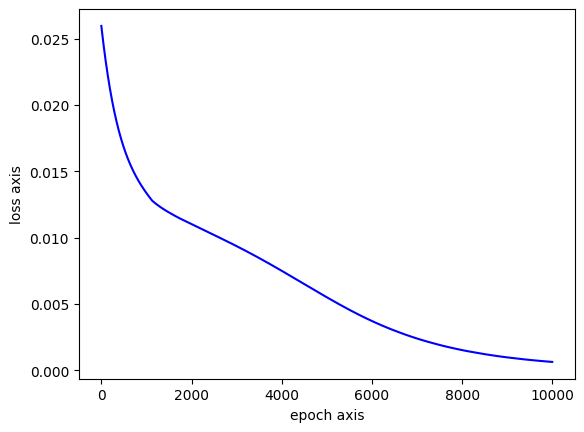

In [145]:
#参数初始化
w1 = np.array([[0.2, 0.3]])

b1 = np.array([[0.1, -0.1]])

w2 = np.array([[0.4, -0.1],
        [0.2, 0.5]])

b2 = np.array([[-0.2, 0.3]])

w3 = np.array([[-0.6],
        [0.7]])

b3 = np.array([0.1])

x = np.array([[1.5],
        [0.5]])

y_true = np.array([[0.6],
          [0.9]])

learning_rate = 0.01
epochs = 10000
losses = []

for epoch in range(epochs):
  y_pred, z1, z2, h1, h2 = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.flatten().mean())

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("Epoch:", epoch + 1,
      "loss:", np.round(loss.flatten().mean(axis=0, keepdims=True), 4),
      "y_pred", np.round(y_pred.flatten(), 4),
      "w1:", np.round(w1.flatten(), 1),
      "w2:", np.round(w2.flatten(), 1),
      "w3:", np.round(w3.flatten(), 1),
      "b1:", np.round(b1.flatten(), 1),
      "b2:", np.round(b2.flatten(), 1),
      "b3:", np.round(b3.flatten(), 1)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()